# Armazenamento NoSQL com Redis e MongoDB

In [1]:
%pip install pymongo redis

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josaf\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
# Conectar no MongoDB (Local)
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client['base_clientes']
colecao = db['compras']

In [3]:
# Inserir os dados
clientes = [
      {"cliente_id": 1, "nome": "Ana", "valor_total": 2200, "cidade": "SP"},
      {"cliente_id": 2, "nome": "João", "valor_total": 500, "cidade": "RJ"},
]
colecao.insert_many(clientes)

InsertManyResult([ObjectId('67dce13a496aa40b2be6f360'), ObjectId('67dce13a496aa40b2be6f361')], acknowledged=True)

In [5]:
# Consulta e analisar
import pandas as pd
df = pd.DataFrame(colecao.find())
df

,_id,cliente_id,nome,valor_total,cidade
0,67dce13a496aa40b2be6f360,1,Ana,2200,SP
1,67dce13a496aa40b2be6f361,2,João,500,RJ


In [6]:
# Armazenar média em cache (Redis)
import redis
r = redis.Redis(host='localhost', port=6379, db=0)
media_valor = df['valor_total'].mean()
r.set("media_valor_total", media_valor)

True

In [9]:
# Recuperar do cache
print(f"Média do valor total (cache): {float(r.get('media_valor_total'))}")

Média do valor total (cache): 1350.0


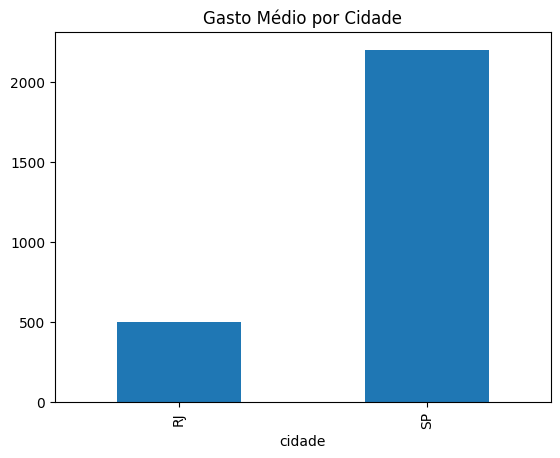

In [10]:
# Visualização
import matplotlib.pyplot as plt
df.groupby("cidade")['valor_total'].mean().plot(kind='bar', title='Gasto Médio por Cidade')
plt.show()